In [21]:
from rb import RandomBoostingRegressor
from rb import RandomBoostingClassifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble._forest import ForestClassifier 
from sklearn.utils.validation import check_is_fitted, check_X_y, check_array, column_or_1d

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.tree import DecisionTreeClassifier, plot_tree  

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_random_state

import warnings
from sklearn.exceptions import DataConversionWarning
# Установка фильтра до импорта scikit-learn
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm.auto import tqdm

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# RandomBoostingClassifier

### Выборка Default of Credit Card Clients Dataset
Ссылка: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

Содержит информацию о платежах клиентов кредитных карт в Тайване с периода Апрель 2005 г. по Сентябрь 2005 г.
Целевая переменная default.payment.next.month - будет ли неплатеж (1 - да, 0 - нет). Классы не сбалансированы - 1:4.
На этой выборке удобно смотреть, какие признаки влияют на целевое предсказание.

Выборка содержит 25 признаков, 1 из которых целевой: \
$ID :$ ID каждого клиента\
$LIMIT\_BAL :$ размер выданного кредита (NT dollar)\
$SEX :$ пол (1=male, 2=female)\
$EDUCATION :$ образование - 6 уникальных значений\
$MARRIAGE :$ брак - 3 уникальных признака\
$AGE :$ возраст\
$PAY_i :$ статус погашения в месяц i - 10 уникальных значений, i лежит в диапазоне [Апрель, Сентябрь]\
$BILL\_AMT_i :$ сумма выписки по счету за месяц i (NT dollar)\
$PAY\_AMT_i :$ сумма предыдущего платежа (NT dollar)\
${default.payment.next\_month} :$ неплатеж - целевая переменная.\


## Подготовка Данных

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv') 
X = df.drop(['default.payment.next.month'], axis = 1)
y = df['default.payment.next.month'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

### Устранения дисбаланса классов

In [4]:
df_class_1 = df[df['default.payment.next.month'] == 1].sample(5051, random_state=42)
df_class_0 = df[df['default.payment.next.month'] == 0].sample(5051, random_state=42)
df_ = pd.concat([df_class_0, df_class_1]).sample(frac=1, random_state=42).reset_index(drop=True).dropna() 
df_ = shuffle(df_, random_state=42).drop(["ID"], axis = 1)

Теперь в качестве метрики качества будет выступать accuracy_score

In [5]:
X_train.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21177,21178,300000.0,1,3,2,31,0,0,0,0,...,84462.0,86263.0,87238.0,89176.0,4000.0,4000.0,4100.0,3300.0,3500.0,3500.0
23942,23943,20000.0,1,2,2,24,0,0,0,0,...,35036.0,14694.0,16914.0,14074.0,1313.0,2110.0,4000.0,6000.0,4000.0,174.0
1247,1248,90000.0,2,2,2,35,-1,-1,-1,-2,...,0.0,0.0,0.0,0.0,2667.0,0.0,0.0,0.0,0.0,0.0
23622,23623,300000.0,2,2,1,40,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28454,28455,70000.0,2,2,2,36,0,0,0,0,...,59165.0,29314.0,28844.0,29443.0,3340.0,2044.0,1773.0,1181.0,1215.0,1297.0


### Описание параметров модели RandomBoostingClassifier

$n\_estimators :$ Количество моделей в ансамбле.

$n\_gb\_estimators :$ Количество деревьев в каждой модели градиентного бустинга.

$loss :$ Функция потерь, используемая для оптимизации. Например, 'log\_loss' для логистической регрессии.

$learning\_rate :$ Темп обучения, влияющий на уменьшение весов каждого дерева градиентного бустинга.

$subsample :$ Доля выборки, которая используется для обучения каждого дерева градиентного бустинга. Например, при значении $0.8$ каждое дерево обучается на 80\% выборки.

$criterion :$ Критерий для оценки расщеплений узлов деревьев градиентного бустинга. Например, 'friedman\_mse' для среднеквадратичной ошибки.

$min\_samples\_split :$ Минимальное количество образцов, необходимых для расщепления узла.

$min\_samples\_leaf :$ Минимальное количество образцов в листе (конечном узле дерева) градиентного бустинга.

$min\_weight\_fraction\_leaf :$ Минимальная доля суммарного веса образцов для каждого листа градиентного бустинга .

$max\_depth :$ Максимальная глубина дерева модели градиентного бустинга, ограничивающая количество уровней в каждом дереве.

$min\_impurity\_decrease :$ Минимальное уменьшение показателя нечистоты (например, Gini или энтропии), требуемое для расщепления узла.

$init :$ Модель, которая используется для начальной инициализации предсказаний.

$random\_state :$ Инициализатор генератора случайных чисел для воспроизводимости результатов.

$max\_features :$ количество признаков, используемых при создании решающего правила на узле дерева градиентного бустинга.

$verbose :$ Уровень подробности вывода во время обучения модели градиентного бустинга.

$max\_leaf\_nodes :$ Максимальное количество конечных узлов (листьев) в каждом дереве градиентного бустинга.

$warm\_start :$ Если $True$, повторно использует предыдущие результаты обучения, добавляя новые модели к существующим в ансамбле.

$validation\_fraction :$ Доля данных, выделяемых для валидации, если включена ранняя остановка.

$n\_iter\_no\_change :$ Количество итераций без улучшений до остановки обучения при ранней остановке.

$tol :$ Пороговое значение для ранней остановки градиентного бустинга, измеряющее минимальное изменение функции потерь.

$ccp\_alpha :$ Параметр для минимизации сложности модели путем обрезки деревьев градиентного бустинга (cost-complexity pruning).

$bootstrap :$ Если $True$, для каждого дерева градиентного бустинга выбирается случайная подвыборка с возвращением.

$oob\_score :$ Если $True$, оценивает модель градиентного бустинга с помощью образцов, не попавших в подвыборку (out-of-bag).

$n\_jobs :$ Количество ядер, используемых для параллельного обучения деревьев.

$max\_samples :$ Если bootstrap включен, максимальное количество образцов для обучения каждого дерева.


## GridSearchCV

In [6]:
param_grid = {
    'n_estimators': [10],
    'n_gb_estimators': [1,2,3,5,10,15,20],
    'learning_rate': [0.1],
    'max_depth': [4],
    'max_features': ['sqrt'],
}

model = RandomBoostingClassifier(random_state=42, n_jobs=-1 ) 

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\n Точность на тестовой выборке:", accuracy_score(y_test, y_pred))
print("\n Средние значимости признаков:", best_model.feature_importances_)
print("\n Дисперсии значимости признаков:", best_model.feature_importances_var_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10, 'n_gb_estimators': 20}

 Точность на тестовой выборке: 0.8152

 Средние значимости признаков: [0.00836766 0.02539547 0.00069389 0.00407019 0.0021639  0.00435199
 0.35574039 0.15452527 0.1156113  0.06852068 0.04686341 0.04929659
 0.01745918 0.00830672 0.00695156 0.0081944  0.00625263 0.00735053
 0.03258378 0.0186507  0.01686677 0.01495445 0.00979453 0.01703399]

 Дисперсии значимости признаков: [6.90759645e-06 1.05723862e-04 6.74312695e-07 4.39974680e-06
 1.35212788e-06 1.93113119e-06 1.69006267e-03 6.63625156e-03
 2.61121417e-03 9.55322945e-04 5.04333536e-04 6.07387320e-04
 3.03151648e-05 6.03529696e-06 1.50568979e-06 8.78968396e-06
 4.72683097e-06 9.76560060e-06 5.57528775e-05 6.74825660e-05
 4.10616826e-05 3.58637981e-05 2.58228261e-05 2.63778122e-05]


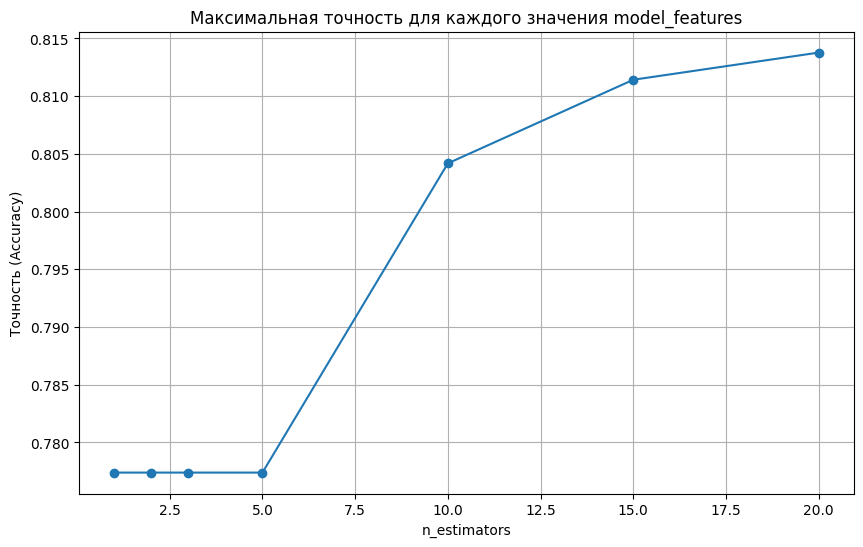

In [7]:
cv_results = grid_search.cv_results_

# Преобразуем результаты в DataFrame для удобства
results_df = pd.DataFrame(cv_results)

# Группировка по max_features и нахождение максимального значения accuracy
max_accuracy_per_max_features = results_df.groupby('param_n_gb_estimators')['mean_test_score'].max()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_accuracy_per_max_features.index, max_accuracy_per_max_features.values, marker='o')
plt.title('Максимальная точность для каждого значения model_features')
plt.xlabel('n_estimators')
plt.ylabel('Точность (Accuracy)')
plt.grid(True)
plt.show()

## Вырождение модели в случай одного дерева и сравнение с DecisionTreeClassifier

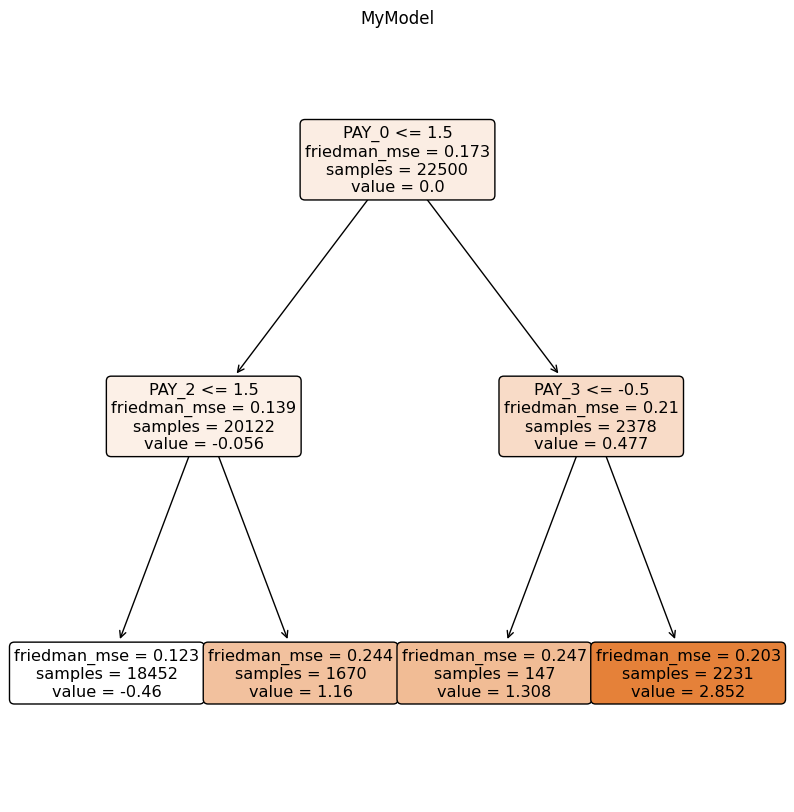

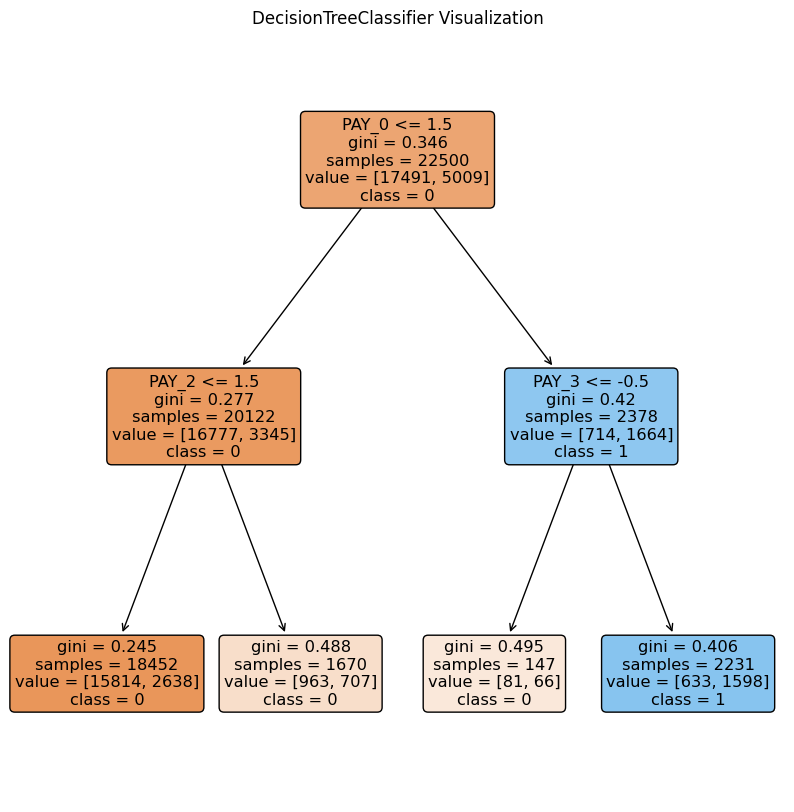

In [8]:
plt.figure(figsize=(10,10))
rbc = RandomBoostingClassifier( n_estimators  = 1 , n_gb_estimators = 1, learning_rate = 0.1, max_depth =  2, max_features =  1., bootstrap = False)  

rbc.fit(X_train, y_train)
selected_tree = rbc.estimators_[0].estimators_[0, 0] 
plot_tree(selected_tree, filled=True,feature_names=X_train.columns,  class_names=np.unique(y_train).astype(str), rounded=True) 
plt.title("MyModel")
plt.show()   




plt.figure(figsize=(10,10))
tree_clf = DecisionTreeClassifier(max_depth=2, max_features = 18, random_state=69) 
tree_clf.fit(X_train, y_train)
#tree_clf.fit(X_train_higgs.sample(frac=1, replace=True, random_state = 60), y_train_higgs.sample(frac=1, replace=True, random_state = 60))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names= np.unique(y_train).astype(str), rounded=True) 
plt.title("DecisionTreeClassifier Visualization")
plt.show()   

## Сравнение с RandomForestClassifier

In [30]:
rf_model = RandomForestClassifier(n_estimators = 30, max_depth = 3, max_features = 1., bootstrap=False,  random_state=89)
rf_model.fit(X_train, y_train)
print('rf_accuracy: ', accuracy_score(y_test, rf_model.predict(X_test)) ) 

rb = RandomBoostingClassifier( n_estimators = 30 , n_gb_estimators = 1, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=89) 
rb.fit(X_train, y_train)
print('accuracy rb: ', accuracy_score( y_test, rb.predict(X_test)) )

rf_accuracy:  0.6776641372484329
accuracy rb:  0.6776641372484329


Вообще говоря, RandomBoostingClassifier не обязан совпадать с RandomForestClassifier даже при n_gb_estimators = 1, - они идентичны только при  
max_features =  1. и  learning_rate=1.

## Демонстрация random_state у разных estimators

In [31]:
rb.estimators_[:5]

[BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=2146170771),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1665720606),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1099241604),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=765119341),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1108533782)]

## Сравнение с GradientBoostingClassifier

In [11]:
gb_model = GradientBoostingClassifier(n_estimators = 30, max_depth = 3, max_features = 1.,learning_rate=1.,  random_state=99)
gb_model.fit(X_train, y_train)
print('gb_accuracy: ', accuracy_score(y_test, gb_model.predict(X_test)) ) 

rb = RandomBoostingClassifier( n_estimators = 1 , n_gb_estimators = 30, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=99) 
rb.fit(X_train, y_train)
print('accuracy rb: ', accuracy_score( y_test, rb.predict(X_test)) )

gb_accuracy:  0.8113333333333334
accuracy rb:  0.8113333333333334


## feature importance

### новые предикторы:
Пример: Задача кредитного скоринга (UCI_Credit_Card) \
Данные: сумма предоставленного кредита, пол, уровень образования, семейное положение, возраст, статус погашения в разные месяцы,  сумма на счету в разные месяцы, суммы предварительных платежей помесячно, факт просрочки платежа \
Преобразование предикторов в поисках лучшего:   

$$
a = \text{BILL\_AMT1},
$$

$$
b = \frac{\text{BILL\_AMT2} + \text{BILL\_AMT3}}{2},
$$

$$
f_1 = a,
$$

$$
f_2 = a - b,
$$

$$
f_3 = 
\begin{cases} 
\frac{a - b}{\max(a, b)}, & a \neq b, \\
0, & a = b.
\end{cases}
$$
BILL\_AMT1, BILL\_AMT2, BILL\_AMT3 - суммы на счету в месяцы от данного   

In [12]:
def f1(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2  
    if a == b and a == 0: 
        return 0 
    else:
        return (a - b)/max(abs(a), abs(b)) 

def f2(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2 
     
    return a - b  
df_['new_feature_1'] = df_.apply(lambda x: f1(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1) 
df_['new_feature_2'] = df_.apply(lambda x: f2(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1)   
df_['new_feature_1_2_equal_zero'] = df_.apply(lambda x: int( x['BILL_AMT1'] == (x['BILL_AMT2'] + x['BILL_AMT3'] )/2 and  x['BILL_AMT1'] == 0 ), axis = 1) 

### Importance новых предикторов, полученный DecisionTreeClassifier глубины 1 и 3:

Accuracy of DecisionTree with max_depth=1: 0.5510
Accuracy of DecisionTree with max_depth=3: 0.5886


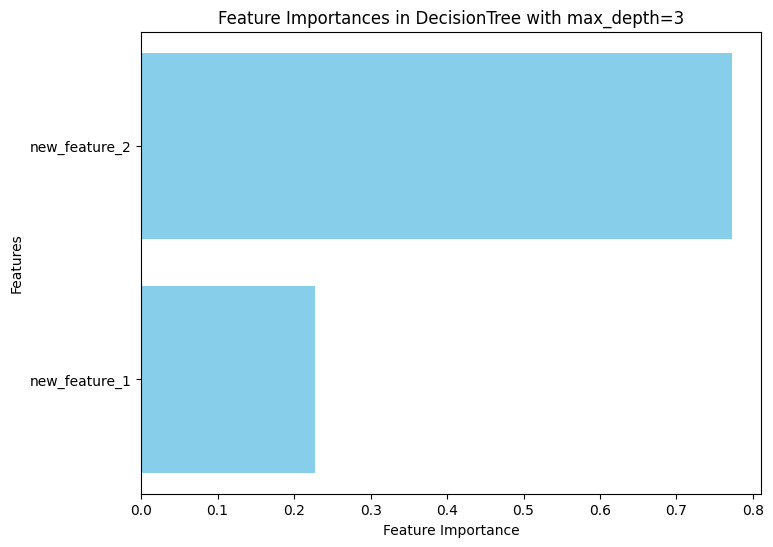

In [13]:
X = df_[['new_feature_1', 'new_feature_2']]
y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_depth_1.fit(X_train, y_train)
y_pred_1 = tree_depth_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of DecisionTree with max_depth=1: {accuracy_1:.4f}") 

tree_depth_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_2.fit(X_train, y_train)
y_pred_2 = tree_depth_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy of DecisionTree with max_depth=3: {accuracy_2:.4f}")
importances = tree_depth_2.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(['new_feature_1', 'new_feature_2'], importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in DecisionTree with max_depth=3')
plt.show()

### Выбор порогов с помощью DecisionTree 

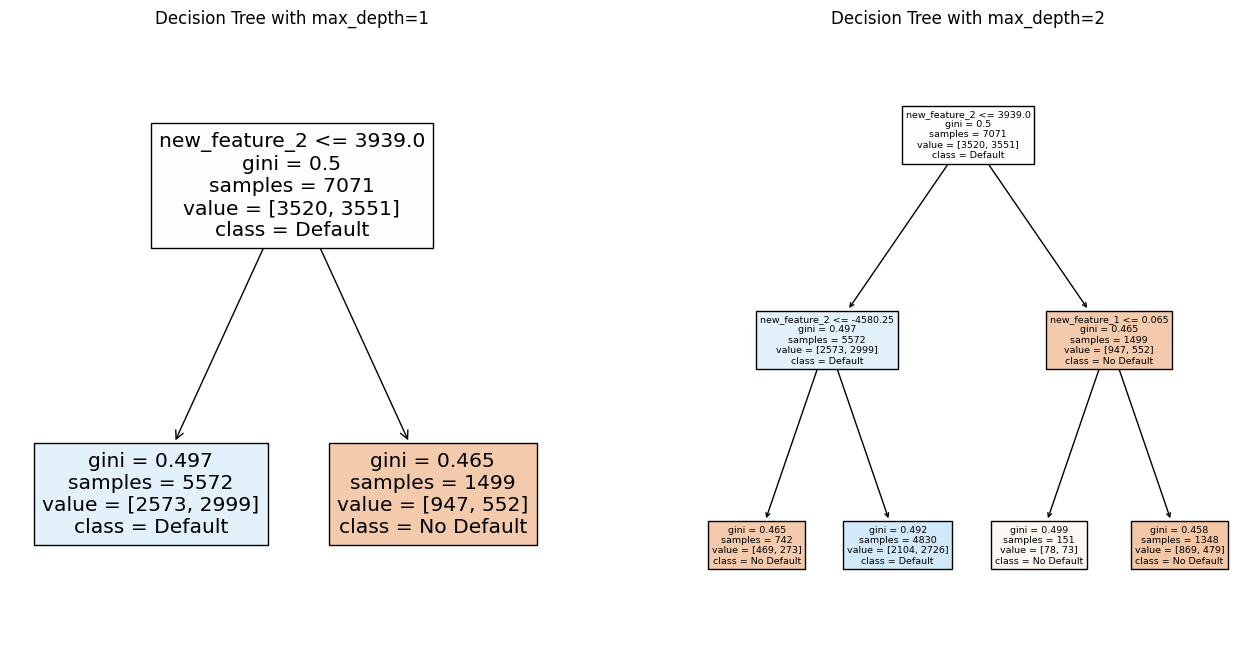

In [14]:
X = df_[['new_feature_1', 'new_feature_2', 'new_feature_1_2_equal_zero']]
y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_depth_1.fit(X_train, y_train)
tree_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_tree(tree_depth_1, filled=True, feature_names=['new_feature_1', 'new_feature_2'], class_names=['No Default', 'Default'])
plt.title("Decision Tree with max_depth=1")
plt.subplot(1, 2, 2)
plot_tree(tree_depth_2, filled=True, feature_names=['new_feature_1', 'new_feature_2'], class_names=['No Default', 'Default'])
plt.title("Decision Tree with max_depth=2")
plt.show()

### интерпритация Causal Inference
Бизнес рекомендация:
“Хочешь снизить на 5% расходы - возьми наш аккредитив” 

На языке $Causal Inference$: \
“оценить эффект аккредитива при снижении расходов на 5%” 

\begin{array}{|c|c|c|c|c|c|}
\hline
i & T & Y & Y(1) & Y(0) & Y(1) - Y(0) \\
\hline
1 & 0 & 1 & ? & 0 & ? \\
2 & 1 & 1 & 1 & ? & ? \\
3 & 1 & 0 & ? & ? & ? \\
4 & 0 & 0 & ? & 0 & ? \\
5 & 0 & 1 & ? & 1 & ? \\
6 & 1 & 1 & 1 & ? & ? \\
\hline
\end{array}

$T$: наблюдаемое лечение \
$Y$: наблюдаемый исход \
$i$: индекс индивида \
$Y_i(1)$: возможный исход при лечении \
$Y_i(0)$: возможный исход без лечения



### Сравнение Feature Importance RandomForestClassifier и GradientBoostingClassifier  
для тестирования Importance моделей мы добавляем искуственно-сгенерированные признаки на основе $PAY_0 $ \
-при правильной оценке модели должны иметь близкий Importance и стоять рядом

In [15]:
X = df_.drop(columns=['default.payment.next.month'])
y = df_['default.payment.next.month']
X['pay_0_1'] = X.apply(lambda x: x['PAY_0']*3, axis = 1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0']/3+50, axis = 1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0']*10-100, axis = 1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis = 1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

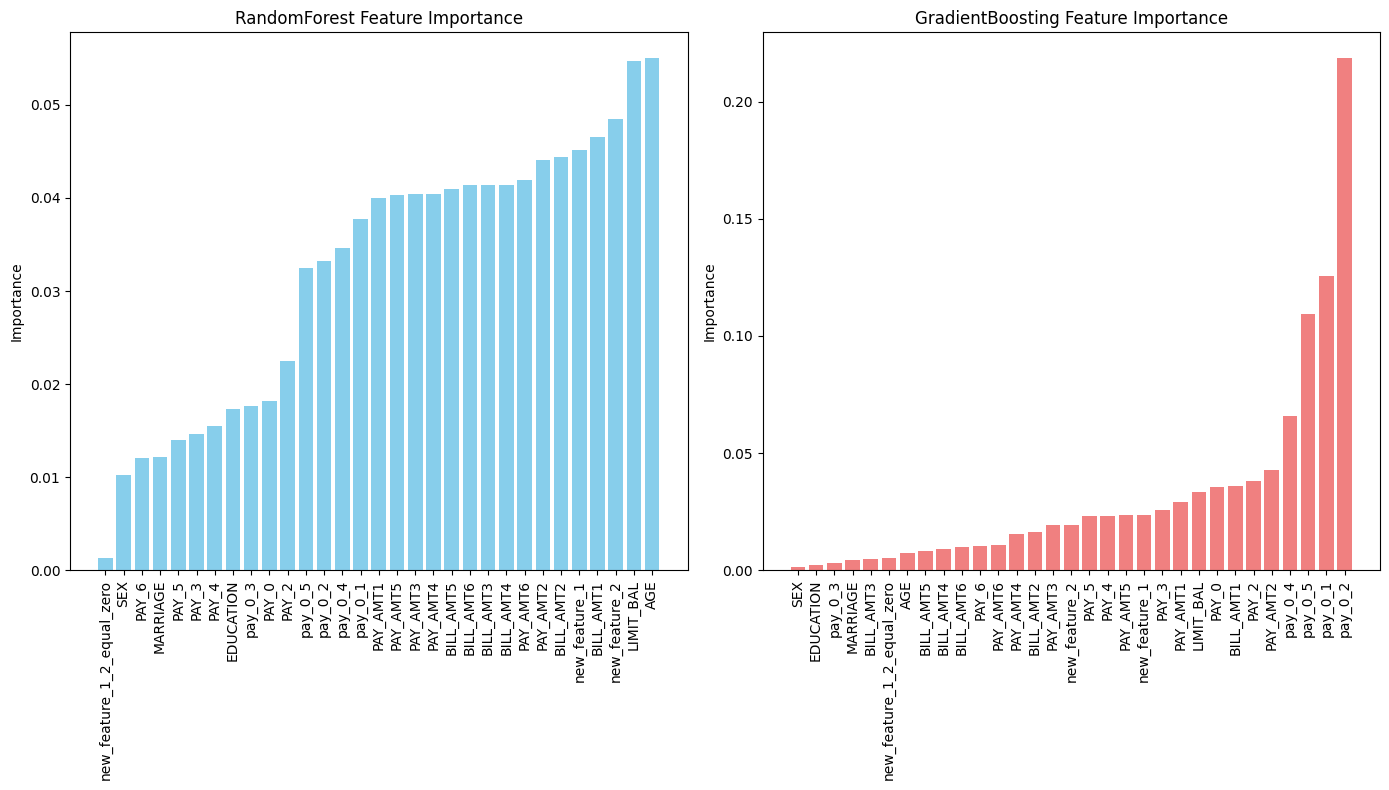

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({ 'Feature': feature_names, 'RandomForest Importance': rf_importances, 'GradientBoosting Importance': gb_importances})

importance_df_rf_sorted = importance_df.sort_values(by='RandomForest Importance', ascending=True)
importance_df_gb_sorted = importance_df.sort_values(by='GradientBoosting Importance', ascending=True)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.bar(importance_df_rf_sorted['Feature'], importance_df_rf_sorted['RandomForest Importance'], color='skyblue')
plt.ylabel('Importance')
plt.title('RandomForest Feature Importance')
plt.xticks(rotation=90)  

plt.subplot(1, 2, 2)
plt.bar(importance_df_gb_sorted['Feature'], importance_df_gb_sorted['GradientBoosting Importance'], color='lightcoral')
plt.ylabel('Importance')
plt.title('GradientBoosting Feature Importance')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

GradientBoostingClassifier не смотря на более высокую точность прогнозирования даёт смещенную оценку Importance из-за иерархии деревьев

## Feature Importance модели RandomForestClassifier 
Importance в каждой модели реализуется через расчет Gain для бустинга (средний прирост точности, который достигается при использовании признака). Для каждой модели рассчитываются значимости признаков по модели. Значимость признака по ансамблю рассчитывается как средняя значимость признака по всем моделям.   
Интервалы доверия для признаков считаются через стандартное отклонение importance по их выборкам, полученным из ансамбля


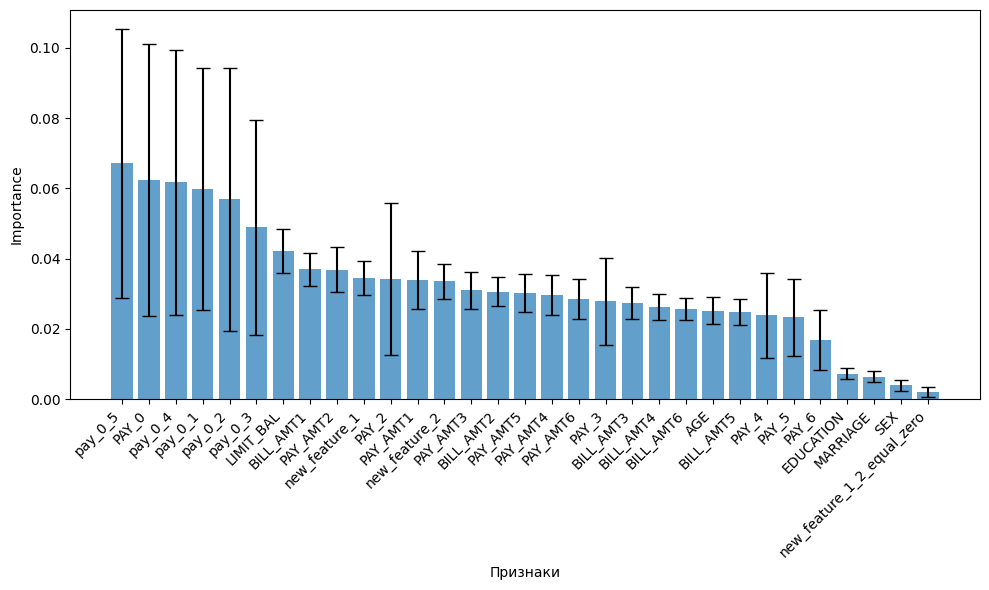

In [18]:
rb = RandomBoostingClassifier( n_estimators  = 60 , n_gb_estimators = 20, learning_rate = 0.1, max_depth =  7, max_features =  'sqrt', n_jobs = -1)    

rb.fit(X_train, y_train)
features = rb.feature_names_in_
importances = rb.feature_importances_
variances =  rb.feature_importances_var_

stds = np.sqrt(variances)
sorted_indices = np.argsort(importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]
sorted_stds = stds[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, yerr=sorted_stds, capsize=5, align='center', alpha=0.7)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha="right")
plt.xlabel('Признаки')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

### Скорость сходимости модели RandomBoostingClassifier  
При фиксированном значении n_gb_estimators для каждого значения n_estimators рассчитывается среднее значении дисперсии по признакам по выборкам их importance по ансамблю

RandomForestClassifier:   0%|          | 0/99 [00:00<?, ?trees/s]

RandomBoosting gb_n=1:   0%|          | 0/99 [00:00<?, ?trees/s]

RandomBoosting gb_n=2:   0%|          | 0/99 [00:00<?, ?trees/s]

RandomBoosting gb_n=5:   0%|          | 0/99 [00:00<?, ?trees/s]

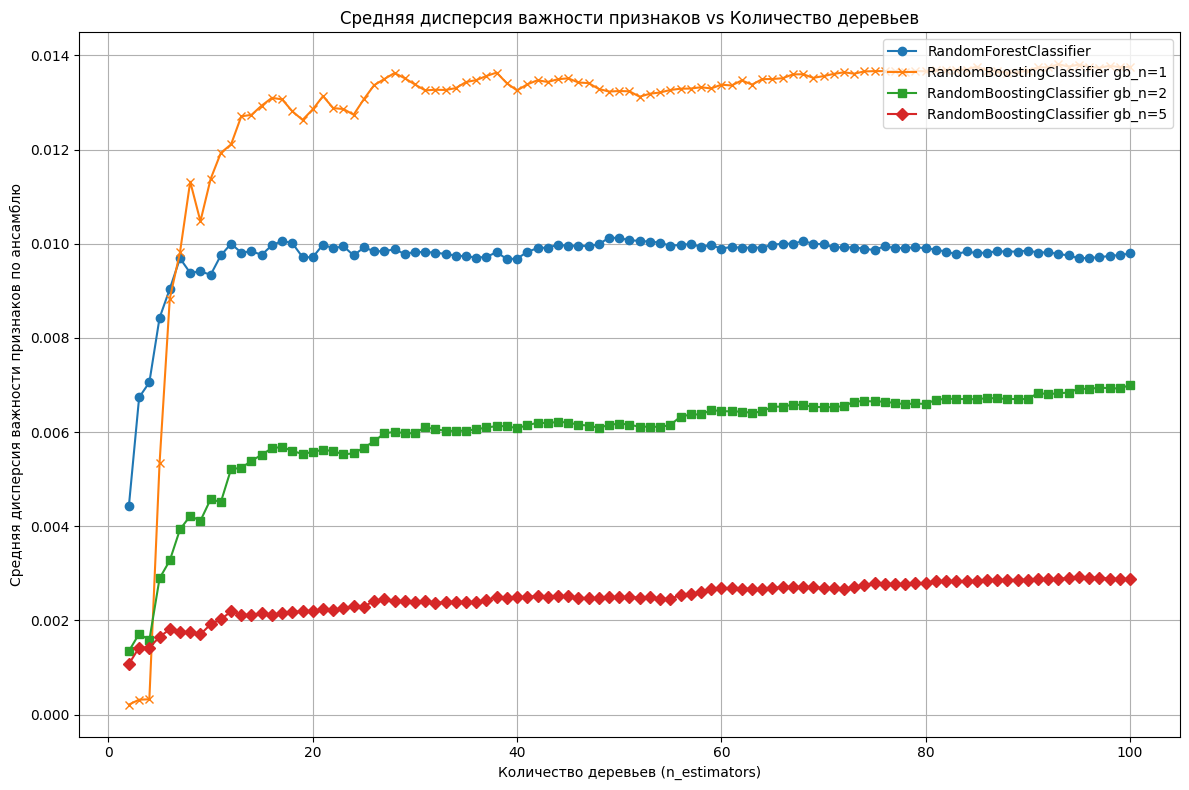

In [24]:
n_estimators_range = list(range(2, 101))
gb_n_values = [1, 2, 5]
avg_variances_rf = []
avg_variances_rb_dict = {gb_n: [] for gb_n in gb_n_values}
rf_pbar = tqdm(n_estimators_range, desc='RandomForestClassifier', position=0, leave=True, unit='trees')
rb_pbars = {
    gb_n: tqdm(n_estimators_range, desc=f'RandomBoosting gb_n={gb_n}', position=i+1, leave=True, unit='trees')
    for i, gb_n in enumerate(gb_n_values)
}
for n_estimators in rf_pbar:
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=5, 
        random_state=69, 
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    feature_importances = np.array([tree.feature_importances_ for tree in rf.estimators_])
    variances = np.var(feature_importances, axis=0)
    avg_variances_rf.append(np.mean(variances))
    rf_pbar.set_postfix({'n_estimators': n_estimators})

for gb_n in gb_n_values:
    rb_pbar = rb_pbars[gb_n]
    for n_estimators in rb_pbar:
        rb = RandomBoostingClassifier(
            n_estimators=n_estimators,
            n_gb_estimators=gb_n,
            learning_rate=0.1,
            max_depth=3,
            max_features='sqrt',
            n_jobs=-1,
            random_state=42
        )
        rb.fit(X_train, y_train)
        feature_importances = np.array([est.feature_importances_ for est in rb.estimators_])
        variances = np.var(feature_importances, axis=0)
        avg_variances_rb_dict[gb_n].append(np.mean(variances))
        rb_pbar.set_postfix({'n_estimators': n_estimators})
rf_pbar.close()
for rb_pbar in rb_pbars.values():
    rb_pbar.close()
plt.figure(figsize=(12, 8))
plt.plot(n_estimators_range, avg_variances_rf, marker='o', label='RandomForestClassifier')
markers = ['x', 's', 'D', '^']  
for idx, gb_n in enumerate(gb_n_values):
    plt.plot(
        n_estimators_range, 
        avg_variances_rb_dict[gb_n], 
        marker=markers[idx], 
        label=f'RandomBoostingClassifier gb_n={gb_n}'
    )
plt.title('Средняя дисперсия важности признаков vs Количество деревьев')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Средняя дисперсия важности признаков по ансамблю')
plt.legend(loc='upper right')  
plt.grid(True)
plt.tight_layout()
plt.show()


## Устойчивость RandomBoostingClassifier   
При фиксированном значении gb_n_estimators для каждого значения n_estimators генерируется и обучается 20 моделей с разными random_seed 
Строится зависимость средней дисперсии важности признаков по выборкам их importance из моделей с разными значениями random_seed

RandomBoosting gb_n=1:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomBoosting gb_n=2:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomBoosting gb_n=5:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomBoosting gb_n=10:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

RandomForest:   0%|          | 0/11 [00:00<?, ?n_estimators/s]

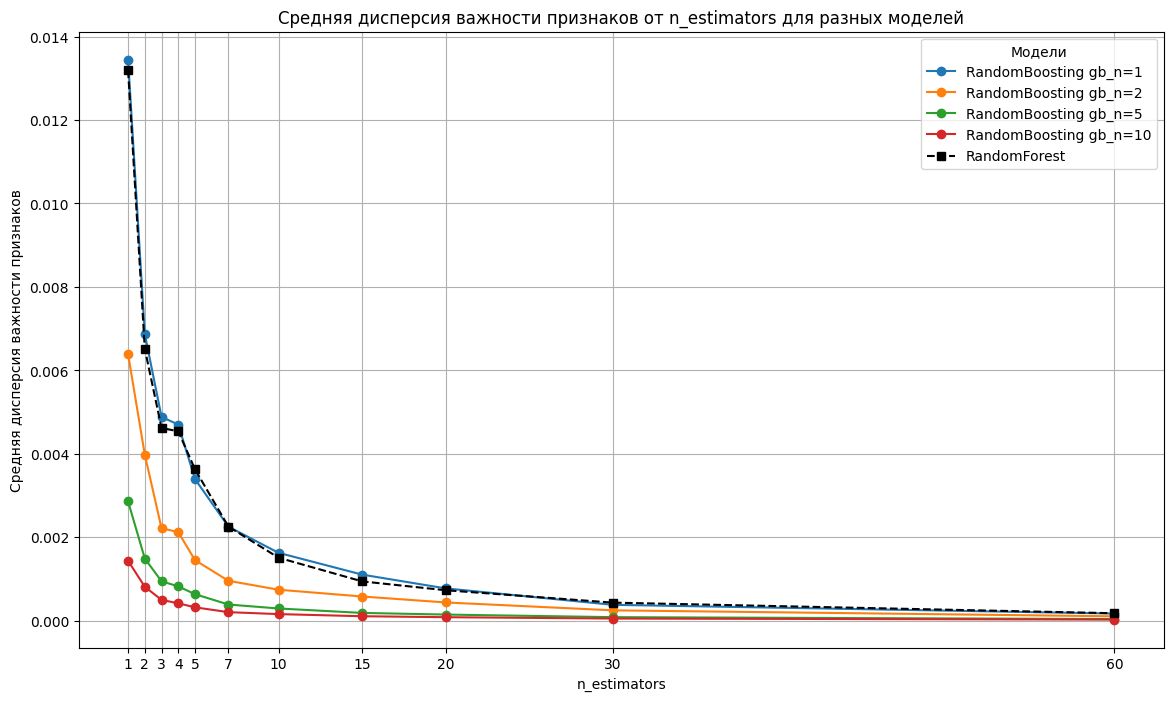

In [25]:
n_estimators_list = [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 60]     
gb_n_estimators_list = [1, 2, 5, 10]      
random_seeds = range(20) 

average_variances = {gb_n: [] for gb_n in gb_n_estimators_list}
average_variances['RandomForest'] = []  

num_bars = len(gb_n_estimators_list) + 1  
pbar_dict = {}

for idx, gb_n in enumerate(gb_n_estimators_list):
    pbar_dict[gb_n] = tqdm(
        total=len(n_estimators_list), 
        desc=f'RandomBoosting gb_n={gb_n}', 
        position=idx, 
        leave=True, 
        unit='n_estimators'
    )
pbar_dict['RandomForest'] = tqdm(
    total=len(n_estimators_list), 
    desc='RandomForest', 
    position=len(gb_n_estimators_list), 
    leave=True, 
    unit='n_estimators'
)

for gb_n in gb_n_estimators_list:
    pbar = pbar_dict[gb_n]
    for n_estimators in n_estimators_list:
        importances_matrix = []
        for seed in random_seeds:
            rb = RandomBoostingClassifier(
                n_estimators=n_estimators,
                n_gb_estimators=gb_n,
                learning_rate=0.1,
                max_depth=3,
                max_features='sqrt',
                n_jobs=-1,
                random_state=seed
            ) 
        
            rb.fit(X_train, y_train)
            importances = rb.feature_importances_
            importances_matrix.append(importances)
        
        importances_matrix = np.array(importances_matrix)
        variances = np.var(importances_matrix, axis=0)
        average_variance = np.mean(variances)
        average_variances[gb_n].append(average_variance)
        pbar.set_postfix({'avg_var': f'{average_variance:.4f}'})
        pbar.update(1)

rf_pbar = pbar_dict['RandomForest']
for n_estimators in n_estimators_list:
    importances_matrix = []
    for seed in random_seeds:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=seed,
            max_depth=3,        
            max_features='sqrt',      
            n_jobs=-1
        )
        
        rf.fit(X_train, y_train)
        importances = rf.feature_importances_
        importances_matrix.append(importances)
    
    importances_matrix = np.array(importances_matrix)
    variances = np.var(importances_matrix, axis=0)
    average_variance = np.mean(variances)
    average_variances['RandomForest'].append(average_variance)
    rf_pbar.set_postfix({'avg_var': f'{average_variance:.4f}'})
    rf_pbar.update(1)

for pbar in pbar_dict.values():
    pbar.close()

# Создание DataFrame для построения графика
variance_df = pd.DataFrame(average_variances, index=n_estimators_list).reset_index()
variance_df = variance_df.rename(columns={'index': 'n_estimators'})

plt.figure(figsize=(14, 8))
for gb_n in gb_n_estimators_list:
    plt.plot(variance_df['n_estimators'], variance_df[gb_n], marker='o', linestyle='-', label=f'RandomBoosting gb_n={gb_n}')
plt.plot(variance_df['n_estimators'], variance_df['RandomForest'], marker='s', linestyle='--', color='black', label='RandomForest')
plt.title('Средняя дисперсия важности признаков от n_estimators для разных моделей')
plt.xlabel('n_estimators')
plt.ylabel('Средняя дисперсия важности признаков')
plt.xticks(n_estimators_list)
plt.legend(title='Модели', loc='upper right') 
plt.grid(True)
plt.show()

### Сходимость feature Importance RandomBoostingClassifier и RandomForestClassifier с увеличением числа деревьев  
max_depth=3  
max_features='sqrt' 
n_gb_estimators=10,
learning_rate=0.1

/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning

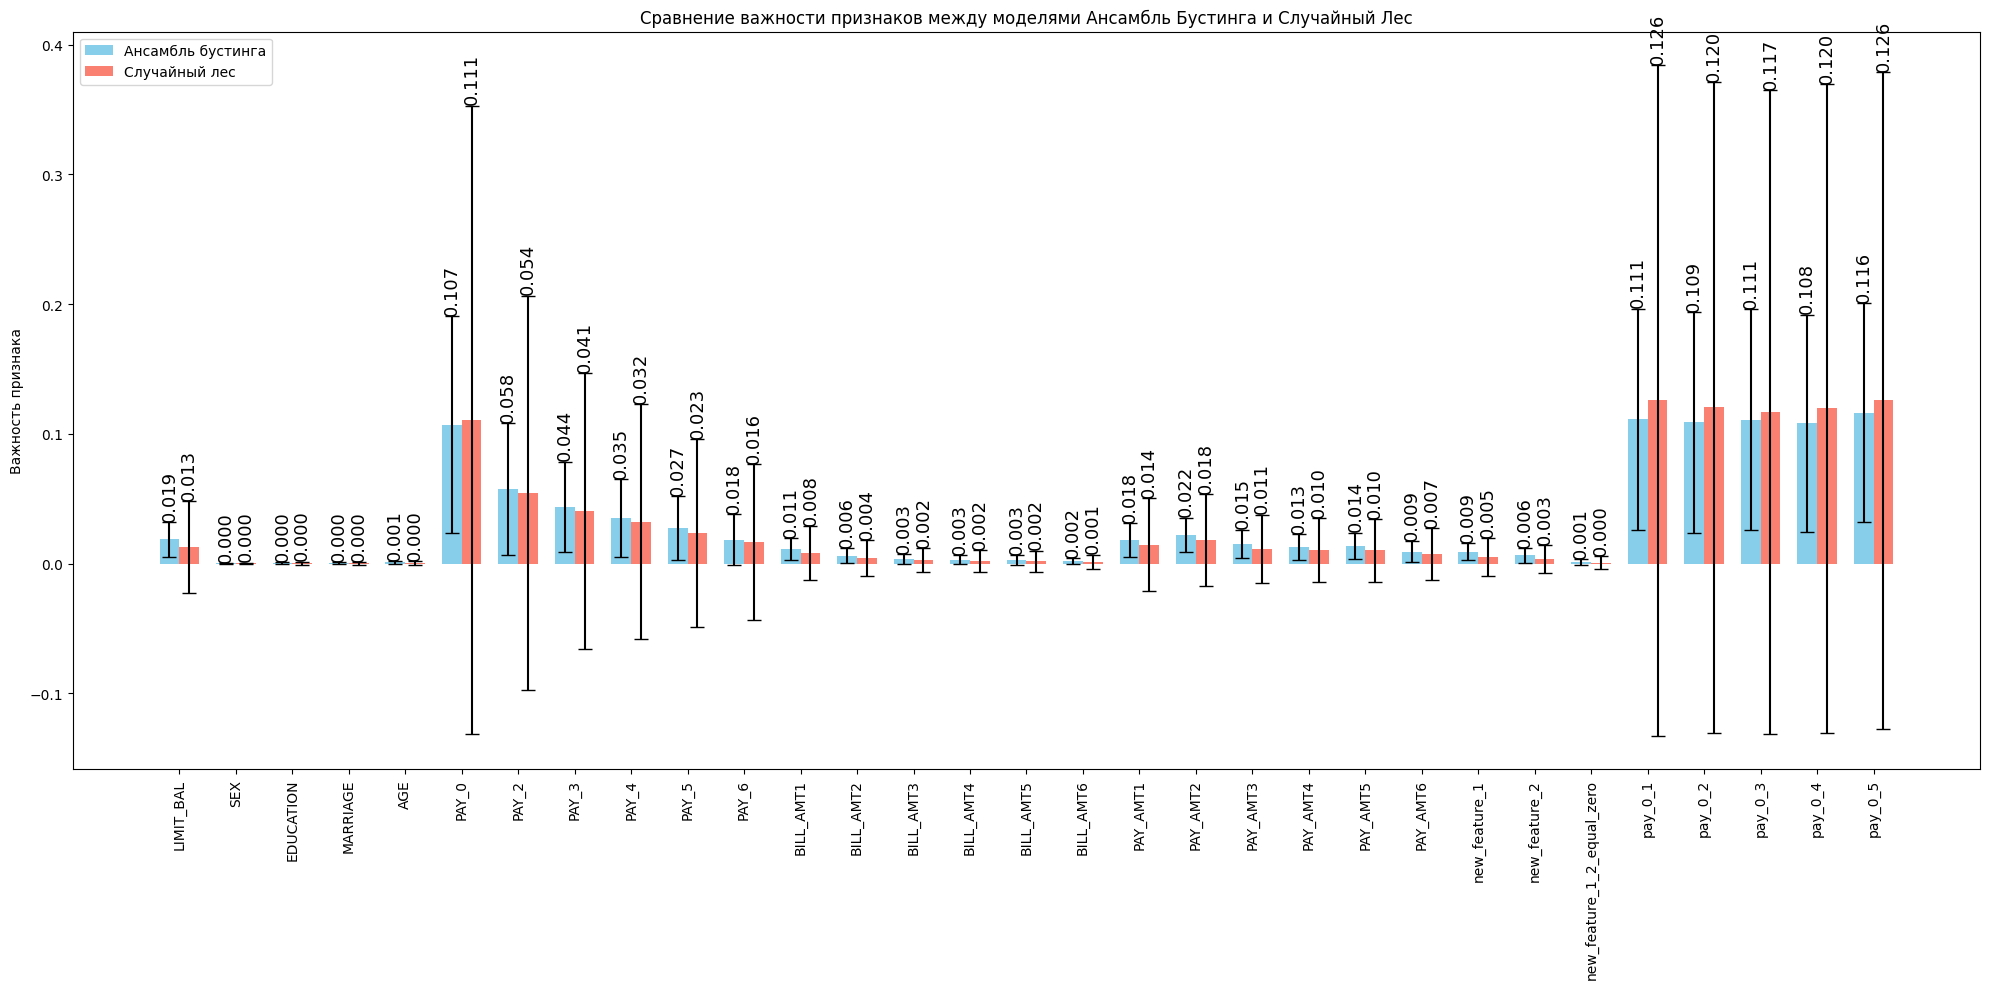

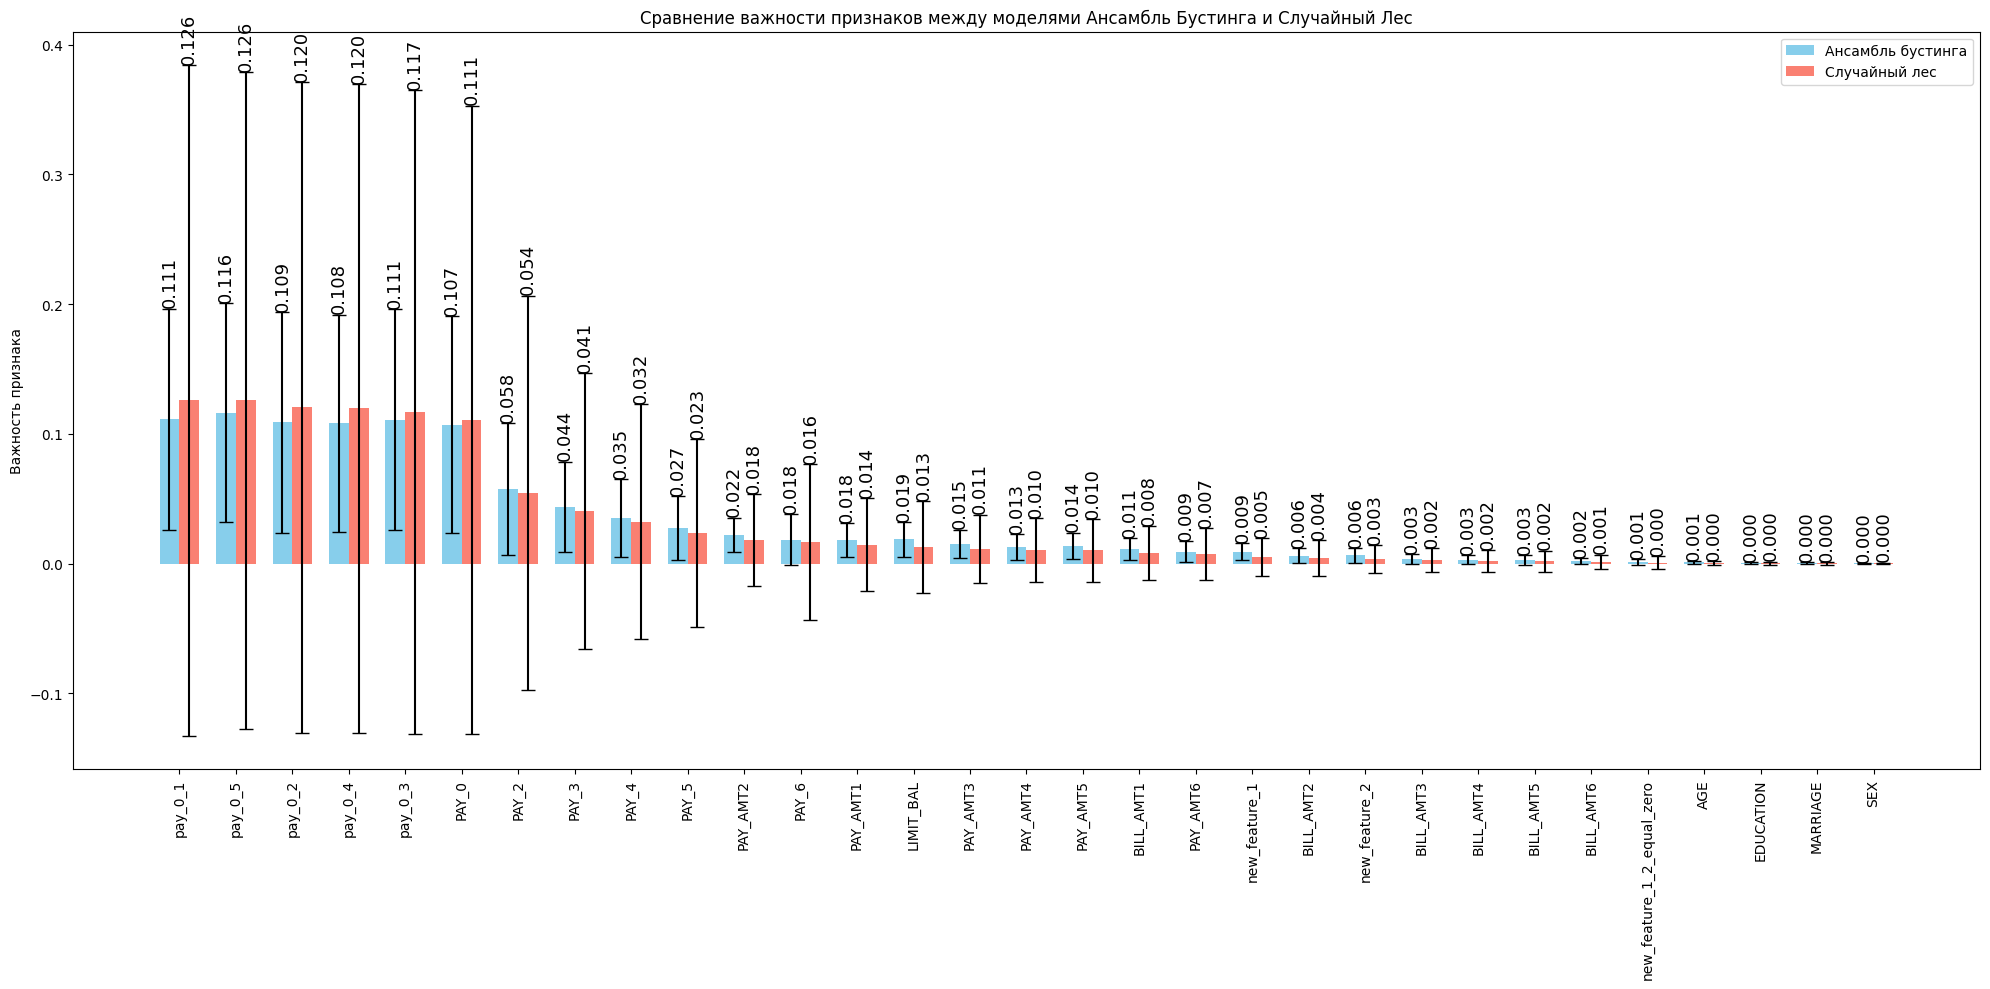

In [17]:
rb = RandomBoostingClassifier( 
    n_estimators = 3600, 
    n_gb_estimators = 10, 
    learning_rate = 0.1, 
    max_depth = 3, 
    max_features = 'sqrt', 
    random_state=69, 
    n_jobs = -1 
    )    

rb.fit(X_train, y_train)
features = rb.feature_names_in_
importances_rb = rb.feature_importances_
variances_rb = rb.feature_importances_var_
stds_rb = np.sqrt(variances_rb)

rf = RandomForestClassifier( 
    n_estimators=6000, 
    max_depth=3, 
    max_features='sqrt', 
    n_jobs=-1, 
    random_state=69
    )
rf.fit(X_train, y_train)
importances_rf_mean = rf.feature_importances_
importances_rf_all = np.array([tree.feature_importances_ for tree in rf.estimators_])
importances_rf = importances_rf_all.mean(axis=0)
variances_rf = importances_rf_all.var(axis=0)
stds_rf = np.sqrt(variances_rf) 

# Убедимся, что порядок признаков совпадает
assert list(features) == list(X.columns), "Порядок признаков не совпадает!"
# Создание позиции для каждого признака
x = np.arange(len(features))  # позиция на оси x
width = 0.35  
fig, ax = plt.subplots(figsize=(20, 10))
bars_rb = ax.bar( x - width/2, importances_rb, width, yerr=stds_rb, label='Ансамбль бустинга', capsize=5, color='skyblue')
bars_rf = ax.bar(x + width/2, importances_rf, width, yerr=stds_rf, label='Случайный лес', capsize=5, color='salmon')

ax.set_ylabel('Важность признака')
ax.set_title('Сравнение важности признаков между моделями Ансамбль Бустинга и Случайный Лес')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=90)
ax.legend()

# Добавление значений важностей над столбцами
for i in range(len(features)):
    # Значения для Ансамбля бустинга
    ax.text(
        x[i] - width/2, 
        importances_rb[i] + stds_rb[i] + 0.001, 
        f"{importances_rb[i]:.3f}", 
        ha='center', va='bottom', fontsize=13, rotation=90
    )
    # Значения для Случайного леса
    ax.text(
        x[i] + width/2, 
        importances_rf[i] + stds_rf[i] + 0.001, 
        f"{importances_rf[i]:.3f}", 
        ha='center', va='bottom', fontsize=13, rotation=90
    )

plt.tight_layout()
plt.show()

# Создание DataFrame для удобства сортировки
importance_df = pd.DataFrame({
    'Feature': features,
    'Boosting': importances_rb,
    'Boosting_std': stds_rb,
    'RandomForest': importances_rf,
    'RandomForest_std': stds_rf
})

# Сортировка по важности ансамбля бустинга
importance_df = importance_df.sort_values(by='RandomForest', ascending=False)

# Обновление порядка признаков
sorted_features = importance_df['Feature'].values
importances_rb_sorted = importance_df['Boosting'].values
stds_rb_sorted = importance_df['Boosting_std'].values
importances_rf_sorted = importance_df['RandomForest'].values
stds_rf_sorted = importance_df['RandomForest_std'].values

# Обновление позиции на оси x
x_sorted = np.arange(len(sorted_features))
# Переотрисовка графика с отсортированными признаками
fig, ax = plt.subplots(figsize=(20, 10))


bars_rb = ax.bar(
    x_sorted - width/2, importances_rb_sorted, width, yerr=stds_rb_sorted,
    label='Ансамбль бустинга', capsize=5, color='skyblue')

# Бар для случайного леса
bars_rf = ax.bar(
    x_sorted + width/2, importances_rf_sorted, width, yerr=stds_rf_sorted,
    label='Случайный лес', capsize=5, color='salmon')

ax.set_ylabel('Важность признака')
ax.set_title('Сравнение важности признаков между моделями Ансамбль Бустинга и Случайный Лес')
ax.set_xticks(x_sorted)
ax.set_xticklabels(sorted_features, rotation=90)
ax.legend()

# Добавление значений важностей над и под столбцами
for i in range(len(sorted_features)):
    ax.text(
        x_sorted[i] - width/2, 
        importances_rb_sorted[i] + stds_rb_sorted[i] + 0.001, 
        f"{importances_rb_sorted[i]:.3f}", 
        ha='center', va='bottom', fontsize=13, rotation=90)
    ax.text(
        x_sorted[i] + width/2, 
        importances_rf_sorted[i] + stds_rf_sorted[i] + 0.001, 
        f"{importances_rf_sorted[i]:.3f}", 
        ha='center', va='bottom', fontsize=13, rotation=90)

plt.tight_layout()
plt.show()


# RandomBoostingRegressor

### загрузка датасета 

In [ ]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Вырождение модели в случай одного дерева и сравнение с DecisionTreeRegressor

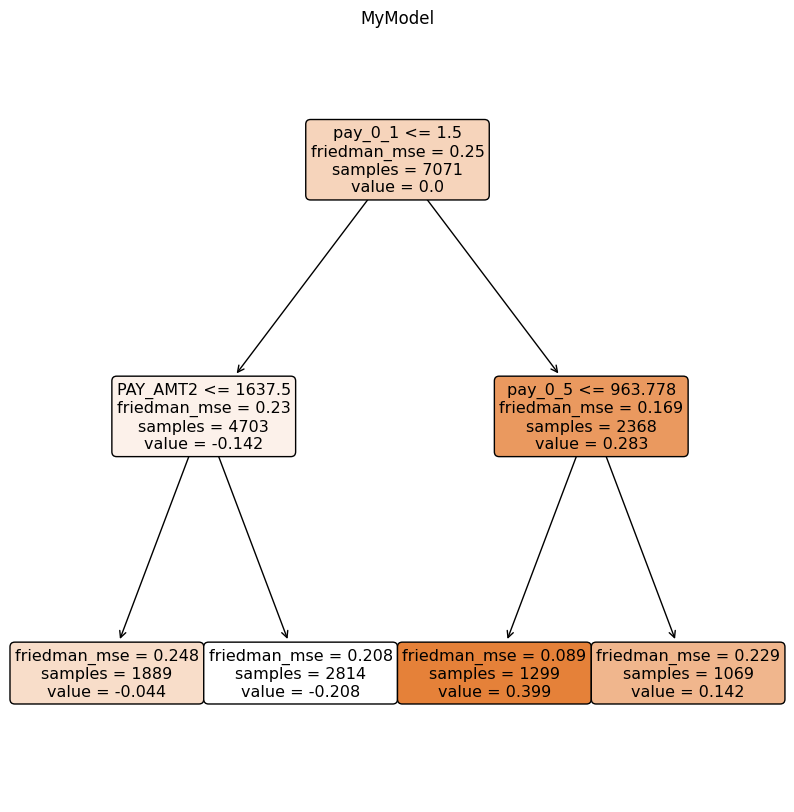

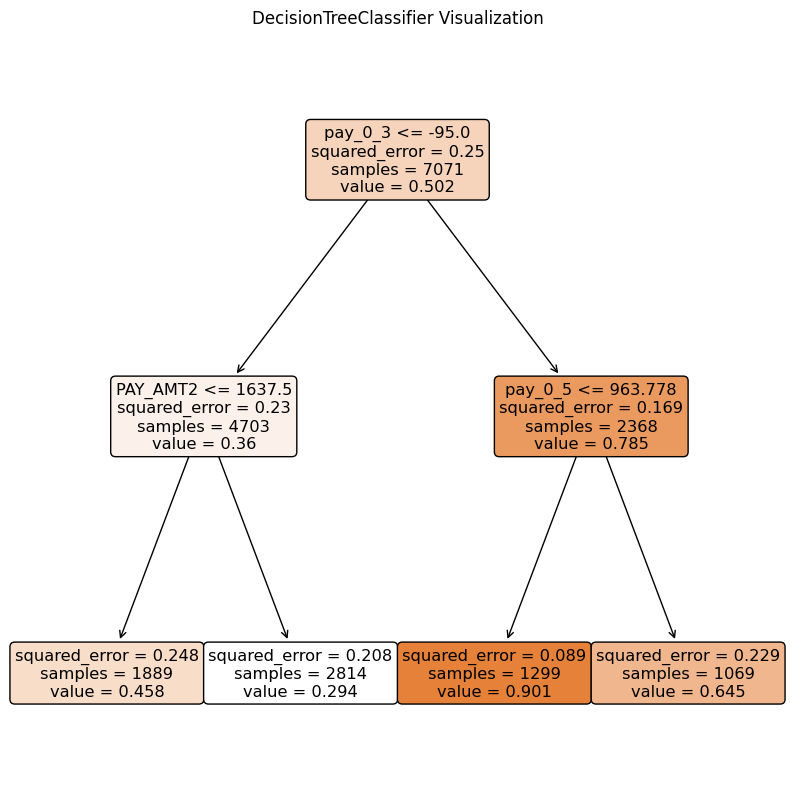

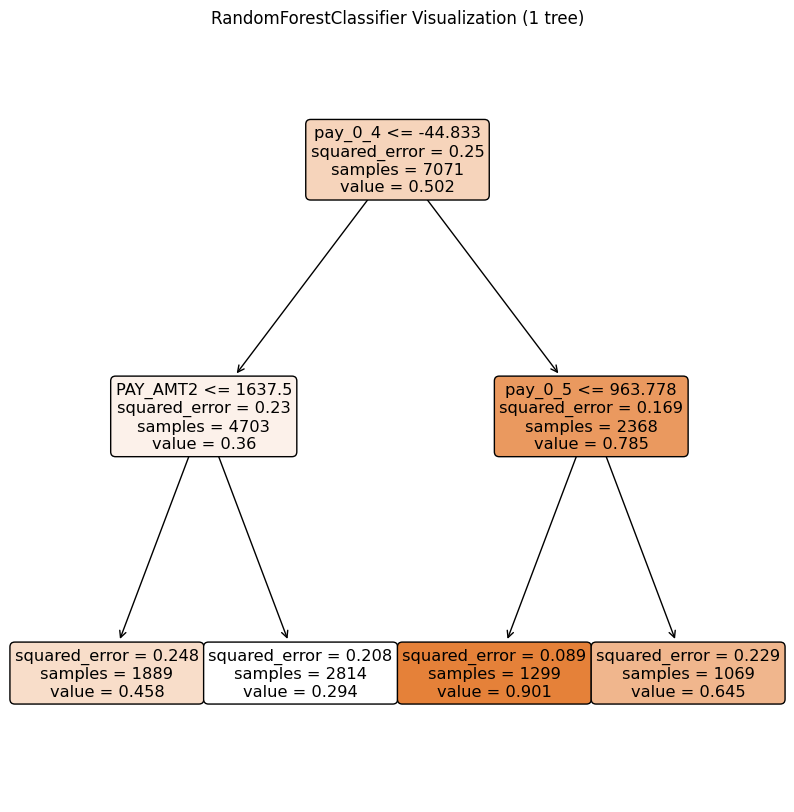

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  

plt.figure(figsize=(10,10))
rbr = RandomBoostingRegressor( n_estimators  = 1 , n_gb_estimators = 1, learning_rate = 0.1, 
                              max_depth =  2, max_features =  1., random_state=69, bootstrap = False)  

rbr.fit(X_train, y_train)
selected_tree = rbr.estimators_[0].estimators_[0, 0] 
plot_tree(selected_tree, filled=True,feature_names=X_train.columns,  class_names=np.unique(y_train).astype(str), rounded=True) 
plt.title("MyModel")
plt.show()  


plt.figure(figsize=(10,10))
tree_clf = DecisionTreeRegressor(max_depth=2, max_features = 1., random_state=69) 
tree_clf.fit(X_train, y_train)
#tree_clf.fit(X_train_higgs.sample(frac=1, replace=True, random_state = 60), y_train_higgs.sample(frac=1, replace=True, random_state = 60))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names= np.unique(y_train).astype(str), rounded=True) 
plt.title("DecisionTreeClassifier Visualization")
plt.show()   

plt.figure(figsize=(10,10))
rf = RandomForestRegressor(n_estimators = 1, max_depth=2, max_features = 1., bootstrap=False,  random_state=69)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), rounded=True)
plt.title("RandomForestClassifier Visualization (1 tree)") 
plt.show()

### сравнение с RandomForestRegressor

In [26]:
rf_model = RandomForestRegressor(n_estimators = 30, max_depth = 3, max_features =1., bootstrap=False,  random_state=69)
rf_model.fit(X_train, y_train)
print('rf_mean_squared_error: ', mean_squared_error(y_test, rf_model.predict(X_test)) ) 

rb = RandomBoostingRegressor( n_estimators = 30, n_gb_estimators = 1, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=69) 
rb.fit(X_train, y_train)
print('mean_squared_error rb: ', mean_squared_error( y_test, rb.predict(X_test)) )

rf_mean_squared_error:  0.20532995924138972
mean_squared_error rb:  0.20514501631459647


### сравнение с GradientBoostingRegressor

In [27]:
gb_model = GradientBoostingRegressor(n_estimators = 30, max_depth = 3, max_features = 1.,learning_rate=1.,  random_state=69)
gb_model.fit(X_train, y_train)
print('mean_squared_error gb: ', mean_squared_error(y_test, gb_model.predict(X_test)) ) 

rb = RandomBoostingRegressor( n_estimators = 1 , n_gb_estimators = 30, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = -1, random_state=69) 
rb.fit(X_train, y_train)
print('mean_squared_error rb: ', mean_squared_error( y_test, rb.predict(X_test)) )

mean_squared_error gb:  0.22796659613412257
mean_squared_error rb:  0.22796391250810435


### GridSearchCV 

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Лучшие параметры:
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.2, 'n_estimators': 30, 'n_gb_estimators': 50}

Лучший MSE на кросс-валидации:
0.1883

Оценка лучшей модели на тестовых данных:
MSE: 0.1977
R²: 0.2089

Доступные параметры для pivot_table:
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_max_features',
       'param_n_estimators', 'param_n_gb_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'mean_test_MSE'],
      dtype='object')

Сводная таблица MSE:
param_max_features          0.2       0.5       0.7       1.0
param_n_gb_estimators                                        
10                     0.198600  0.198245  0.198150  0.198077
20                     0.190802  0.190771  0.190849  0.190846
50           

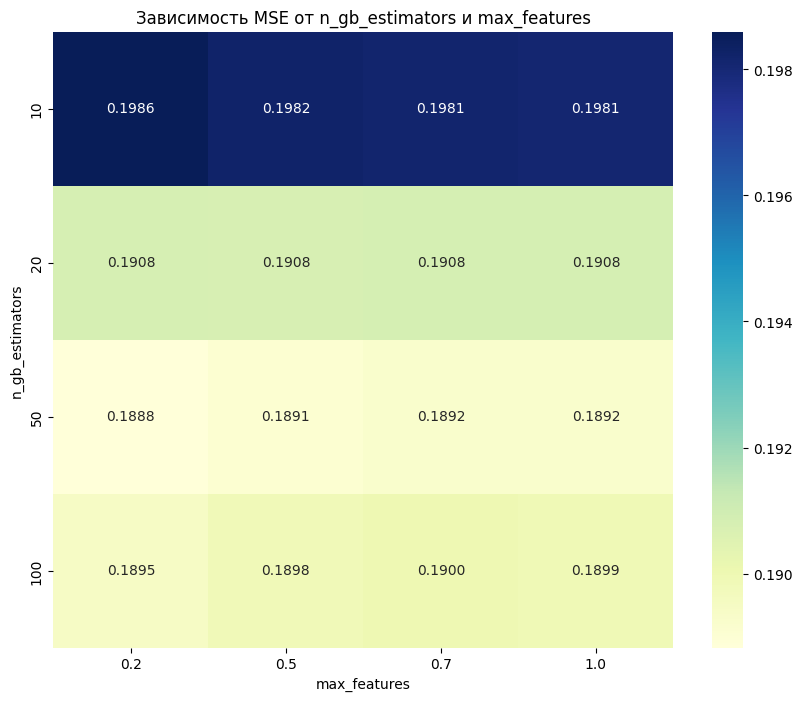

In [29]:
rb_regressor = RandomBoostingRegressor(random_state=42)

param_grid = {
    'max_features': [0.2, 0.5, 0.7, 1.0],
    'n_estimators': [30],
    'n_gb_estimators': [10, 20, 50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
}

scoring = 'neg_mean_squared_error'
grid_search = GridSearchCV(
    estimator=rb_regressor,
    param_grid=param_grid,
    scoring=scoring,
    cv=3,
    n_jobs=-1,  
    verbose=2
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:")
print(grid_search.best_params_)

print("\nЛучший MSE на кросс-валидации:")
best_mse = -grid_search.best_score_
print(f"{best_mse:.4f}")


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\nОценка лучшей модели на тестовых данных:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")

results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_MSE'] = -results['mean_test_score']
print("\nДоступные параметры для pivot_table:")
print(results.columns)

pivot_table = results.pivot_table(
    values='mean_test_MSE',
    index='param_n_gb_estimators',       
    columns='param_max_features'         
)

print("\nСводная таблица MSE:")
print(pivot_table)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Зависимость MSE от n_gb_estimators и max_features")
plt.xlabel("max_features")
plt.ylabel("n_gb_estimators")
plt.show()